<a href="https://colab.research.google.com/github/Luispsps/Disaster-Classification-Exploration/blob/main/Disaster_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disaster-Classfier-Project
This project aims to leverage the insights and groundwork laid by another individual to further enhance and simplify the existing framework.

Our goals throughout this project:
- Retrieve data and have them set into their own file
- Make pre-trained model with the right configurations
- Train model and at least reach 75% accuracy
- After, hopefully, successful training we will add a fake vs real dataset
- Train model again and reach high accuracy to identify fake images

This project is mainly to explore more posibilities with Machine Learning during Seimic Events.


## Retrieving 'fake' dataset and preparing it :






In [ ]:
import os
import shutil

In [ ]:
#Unzips the Kaggle 'Fake vs Real' dataset
!unzip '/content/archive (4).zip'

In [ ]:
#Makes directory to store training and testing dataset
!mkdir 'GM'

In [ ]:
#function that creates training and testing folder in GM
def create_subfolder(parent_folder, subfolder_name):
    subfolder_path = os.path.join(parent_folder, subfolder_name)
    os.makedirs(subfolder_path, exist_ok=True)

#Using the function previously made to make training subfolder
parent_folder = "/content/GM"
subfolder_name = "training"

create_subfolder(parent_folder, subfolder_name)

#Using the function previously made to make training subfolder
parent_folder = "/content/GM"
subfolder_name = "testing"

create_subfolder(parent_folder, subfolder_name)

In [ ]:
#Here we are scanning through the '/content' to look at all the images and then take the majority of them and put them to trianing
source_folder = "/content"
destination_folder = "/content/GM/training"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files) - 200

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [ ]:
#Here we are scanning through the '/content' again to look at all the images and then take the rest of the images into testing
source_folder = "/content"
destination_folder = "/content/GM/testing"

files = [file for file in os.listdir(source_folder) if file.lower().endswith(".jpg")]

num_files_to_transfer = len(files)

for file in files[:num_files_to_transfer]:
  source_path = os.path.join(source_folder, file)
  destination_path = os.path.join(destination_folder, file)
  shutil.move(source_path, destination_path)

In [ ]:
#lookin at the numbber of images in file
folder_path = '/content/GM/testing'

files = os.listdir(folder_path)

num_files = len(files)

print(num_files)

200


In [ ]:
#lookin at the numbber of images in file
folder_path = '/content/GM/training'

files = os.listdir(folder_path)

num_files = len(files)

print(num_files)

476


In [ ]:
folder_path = '/content/GM/train/FAKE'

files = os.listdir(folder_path)

num_files = len(files)

print(num_files)

50000


In [ ]:
folder_path = '/content/GM/train/REAL'

files = os.listdir(folder_path)

num_files = len(files)

print(num_files)

50000


# Retreving the MEDIC dataset and preparing it

In [ ]:
#All the important imports for this project
import os
import sys
import shutil
import time
import timeit
import json

import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import clear_output
import cv2

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Lambda
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
    ModelCheckpoint,
    TensorBoard
)

In [ ]:
#Here we use wget to install the MEDIC Dataset, its a 11 GB file
if os.path.isdir('sample_data'):
    shutil.rmtree('sample_data')

if not os.path.isdir('crisis_vision_benchmarks'):
    t1 = timeit.default_timer()
    !wget --tries=30 https://crisisnlp.qcri.org/data/crisis_image_datasets_benchmarks/crisis_vision_benchmarks.tar.gz
    t2 = timeit.default_timer()

    clear_output()
    print('Total time to download the dataset: {:.2f} min'.format((t2-t1) / 60))

Total time to download the dataset: 21.07 min


In [ ]:
#Here we are unzipping the tar file and then removing a few parts of it to save space
if not os.path.isdir('crisis_vision_benchmarks'):
    t1 = timeit.default_timer()
    !tar --gunzip --extract --verbose --file=crisis_vision_benchmarks.tar.gz
    t2 = timeit.default_timer()

    clear_output()
    print('Total time to extract the dataset: {:.2f} min'.format((t2-t1) / 60))

    os.remove('crisis_vision_benchmarks.tar.gz')

    shutil.rmtree('crisis_vision_benchmarks/data/ASONAM17_Damage_Image_Dataset')
    shutil.rmtree('crisis_vision_benchmarks/data/aidr_info')

Total time to extract the dataset: 2.71 min


In [ ]:
#Here we create a function that would retrieve the image path to the images inside the /GM/traiing and /GM/testing
def get_image_paths(folder_path):
    image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".gif"]
    image_paths = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if any(file_name.lower().endswith(ext) for ext in image_extensions):
            image_paths.append(file_path)

    return image_paths

#Here we extract the training image paths first
folder_path = "/content/crisis_vision_benchmarks/GM/training"

new_image_paths = get_image_paths(folder_path)
print(len(new_image_paths))

word = "FAKE"
train_count = 200
word_list = [word] * train_count
print(word_list)

#Here is where we will temporarily store image paths to access the 'fake vs real' training images
new_image_paths = [path[9:100] for path in new_image_paths]

print(new_image_paths)
print(len(new_image_paths))

476
['FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FA

In [ ]:
#Here we extract the testing image paths first
folder_path = "/content/crisis_vision_benchmarks/GM/testing"

new_new_image_paths = get_image_paths(folder_path)
print(len(new_new_image_paths))

word = "FAKE"
test_count = 476
word_list2 = [word] * test_count
print(word_list2)

#Here is where we will temporarily store image paths to access the 'fake vs real' testing images
new_new_image_paths = [path[9:100] for path in new_new_image_paths]

print(new_new_image_paths)
print(len(new_new_image_paths))

200
['FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FA

In [ ]:
#The code here will retrieve the TSV file with all the images path and take those image paths and store them
data_root = os.path.join(os.getcwd(), 'crisis_vision_benchmarks/')

annot_train_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_train_final.tsv')
annot_dev_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_dev_final.tsv')
annot_test_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_test_final.tsv')



# training data
print('TRAINING')
df = pd.read_csv(annot_train_path, sep='\t')
train_img_paths = df['image_path'].tolist()
train_labels = df['class_label'].tolist()

#Here is where we will add into the training paths and labels with the 'fake vs real' paths
train_img_paths.extend(new_image_paths)
train_labels.extend(word_list)

# overview on the balance of the dataset label
unique_labels = pd.unique(df['class_label'])
for unique_label in unique_labels:
    _ = df.loc[(df['class_label']==unique_label)]
    print(f'{unique_label}:', _.shape[0])

# dev data
print('\nVALIDATION')
df = pd.read_csv(annot_dev_path, sep='\t')
dev_img_paths = df['image_path'].tolist()
dev_labels = df['class_label'].tolist()

#Here is where we will add into the testing paths and labels with the 'fake vs real' paths
dev_img_paths.extend(new_new_image_paths)
dev_labels.extend(word_list)

# test data
print('\nTEST')
df = pd.read_csv(annot_test_path, sep='\t')
test_img_paths = df['image_path'].tolist()
test_labels = df['class_label'].tolist()

# example
df.head()

TRAINING
hurricane: 1444
not_disaster: 3666
fire: 1270
flood: 2336
earthquake: 2058
other_disaster: 1132
landslide: 940

VALIDATION

TEST


,event_name,image_id,image_path,class_label
0,AIDR,1051850186446831618_0,data/aidr_disaster_types/hurricane_michael_201...,hurricane
1,AIDR,961262549005230080_2,data/aidr_disaster_types/natural_disaster/7_2_...,earthquake
2,AIDR,1037983665995706368_0,data/aidr_disaster_types/kerala_flood_2018/7_9...,flood
3,AIDR,597324321418149888_0,data/aidr_disaster_types/nepal_earthquake/10_5...,earthquake
4,AIDR,673228466414686208_0,data/aidr_disaster_types/chennai_flood/5_12_20...,not_disaster


In [ ]:
import os
import pandas as pd

data_root = os.path.join(os.getcwd(), 'crisis_vision_benchmarks/')

annot_train_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_train_final.tsv')
annot_dev_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_dev_final.tsv')
annot_test_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_test_final.tsv')

# Function to filter rows with label 'earthquake'
def filter_earthquake(df):
    return df[df['class_label'] == 'earthquake']

# training data
print('TRAINING')
df_train = pd.read_csv(annot_train_path, sep='\t')
df_train = filter_earthquake(df_train)
train_img_paths = df_train['image_path'].tolist()



# dev data
print('\nVALIDATION')
df_dev = pd.read_csv(annot_dev_path, sep='\t')
df_dev = filter_earthquake(df_dev)
dev_img_paths = df_dev['image_path'].tolist()



# test data
print('\nTEST')
df_test = pd.read_csv(annot_test_path, sep='\t')
df_test = filter_earthquake(df_test)
test_img_paths = df_test['image_path'].tolist()

# example
df_train.head()

TRAINING

VALIDATION

TEST


,event_name,image_id,image_path,class_label
7,AIDR,598039092916523008_0,data/aidr_disaster_types/nepal_earthquake/12_5...,earthquake
19,AIDR,598167653031620608_0,data/aidr_disaster_types/nepal_earthquake/12_5...,earthquake
22,AIDR,593257530559569920_0,data/aidr_disaster_types/nepal_earthquake/29_4...,earthquake
27,AIDR,593262182441222144_3,data/aidr_disaster_types/nepal_earthquake/29_4...,earthquake
28,AIDR,593224377522458625_0,data/aidr_disaster_types/nepal_earthquake/29_4...,earthquake


In [ ]:
data_root = os.path.join(os.getcwd(), 'crisis_vision_benchmarks/')

annot_train_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_train_final.tsv')
annot_dev_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_dev_final.tsv')
annot_test_path = os.path.join(data_root, 'tasks/disaster_types/consolidated/consolidated_disaster_types_test_final.tsv')

# Function to filter rows with a specific label
def filter_label(df, label):
    return df[df['class_label'] == label]

# training data
print('TRAINING')
df_train = pd.read_csv(annot_train_path, sep='\t')
df_train = filter_label(df_train, 'earthquake')
train_img_paths = df_train['image_path'].tolist()

# dev data
print('\nVALIDATION')
df_dev = pd.read_csv(annot_dev_path, sep='\t')
df_dev = filter_label(df_dev, 'earthquake')
dev_img_paths = df_dev['image_path'].tolist()

# test data
print('\nTEST')
df_test = pd.read_csv(annot_test_path, sep='\t')
df_test = filter_label(df_test, 'earthquake')
test_img_paths = df_test['image_path'].tolist()

# Add new paths and labels

train_img_paths.extend(new_image_paths)
dev_img_paths.extend(new_new_image_paths)

train_labels = ['earthquake'] * len(df_train) + word_list
dev_labels = ['earthquake'] * len(df_dev) + word_list2


# example
df_train.head()

TRAINING

VALIDATION

TEST


,event_name,image_id,image_path,class_label
7,AIDR,598039092916523008_0,data/aidr_disaster_types/nepal_earthquake/12_5...,earthquake
19,AIDR,598167653031620608_0,data/aidr_disaster_types/nepal_earthquake/12_5...,earthquake
22,AIDR,593257530559569920_0,data/aidr_disaster_types/nepal_earthquake/29_4...,earthquake
27,AIDR,593262182441222144_3,data/aidr_disaster_types/nepal_earthquake/29_4...,earthquake
28,AIDR,593224377522458625_0,data/aidr_disaster_types/nepal_earthquake/29_4...,earthquake


In [ ]:
#prints to view data
print(len(train_img_paths))
print(len(df_train))

print(len(dev_img_paths))
print(len(df_dev))

2534
2058
407
207


In [ ]:
#prints to view data
print(dev_img_paths)
print(train_img_paths)

['data/aidr_disaster_types/terremotoitalia/14_11_2016/798023747378683904_0.jpg', 'data/aidr_disaster_types/nepal_earthquake/27_4_2015/592768768138424320_0.jpg', 'data/aidr_disaster_types/nepal_earthquake/25_4_2015/592075822611070976_0.jpg', 'data/aidr_disaster_types/nepal_earthquake/30_4_2015/593735285307011073_3.jpg', 'data/aidr_disaster_types/nepal_earthquake/27_4_2015/592635198103166977_1.jpg', 'data/aidr_disaster_types/nepal_earthquake/30_4_2015/593803287377285121_2.jpg', 'data/aidr_disaster_types/natural_disaster/27_2_2018/968396228328345601_0.jpg', 'data/aidr_disaster_types/nepal_earthquake/26_4_2015/592228122805858304_1.jpg', 'data/aidr_disaster_types/nepal_earthquake/29_4_2015/593463858343313410_0.jpg', 'data/aidr_disaster_types/nepal_earthquake/30_4_2015/593729388413222912_1.jpg', 'data/aidr_disaster_types/natural_disaster/25_10_2017/923297196291665920_0.jpg', 'data/aidr_disaster_types/natural_disaster/24_11_2017/933982454557310976_0.jpg', 'data/aidr_disaster_types/nepal_earth

In [ ]:
#Fucntion that collects all unnique labels
def get_unique(alist):
    np_arr = np.array(alist)
    return np.unique(np_arr)

#Throughout the following code, it is making the data into tensors (Basically combining the labels and image paths)
data_root = tf.convert_to_tensor(data_root, tf.string)
unique_label = get_unique(train_labels)

# training
training_data = list(zip(train_img_paths, train_labels))
trainDS = tf.data.Dataset.from_tensor_slices(training_data)

# dev (validation)
data = list(zip(dev_img_paths, dev_labels))
valDS = tf.data.Dataset.from_tensor_slices(data)

# testing


In [ ]:
#prints to view data
print(training_data)

[('data/aidr_disaster_types/nepal_earthquake/12_5_2015/598039092916523008_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/12_5_2015/598167653031620608_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/29_4_2015/593257530559569920_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/29_4_2015/593262182441222144_3.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/29_4_2015/593224377522458625_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/28_4_2015/593146107577954304_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/28_4_2015/593126284751990784_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/8_5_2015/596684395731427328_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthquake/30_4_2015/593648452728332288_3.jpg', 'earthquake'), ('data/aidr_disaster_types/natural_disaster/13_3_2018/973690264463265792_0.jpg', 'earthquake'), ('data/aidr_disaster_types/nepal_earthqu

In [ ]:
#prints to view data
print(data_root)

tf.Tensor(b'/content/crisis_vision_benchmarks/', shape=(), dtype=string)


In [ ]:
#prints to view data
print(len(valDS))

print(len(trainDS))


407
2258


In [ ]:
#The prints show the how the data is being stored and prepared
print("Training dataset:")
for image_path, label in trainDS.take(5):  # Taking first 5 elements as an example
    print("Image Path:", image_path.numpy())
    print("Label:", label.numpy())

# Inspect validation dataset
print("\nValidation dataset:")
for image_path, label in valDS.take(5):  # Taking first 5 elements as an example
    print("Image Path:", image_path.numpy())
    print("Label:", label.numpy())



Training dataset:
Image Path: b'data/aidr_disaster_types/nepal_earthquake/12_5_2015/598039092916523008_0.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/12_5_2015/598167653031620608_0.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/29_4_2015/593257530559569920_0.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/29_4_2015/593262182441222144_3.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/29_4_2015/593224377522458625_0.jpg'
Label: b'earthquake'

Validation dataset:
Image Path: b'data/aidr_disaster_types/terremotoitalia/14_11_2016/798023747378683904_0.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/27_4_2015/592768768138424320_0.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/25_4_2015/592075822611070976_0.jpg'
Label: b'earthquake'
Image Path: b'data/aidr_disaster_types/nepal_earthquake/3

In [ ]:
print(data_root)

In [ ]:
#Fucntion that loads data when divent a specific dataset
def load_data(data):
    # split the data into x and y (image and label)
    image_path = data[0]
    label = data[1]
    # read the image from disk, decode it, resize it
    image_path = tf.strings.join([data_root, image_path])
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    #testing to see if 224x224 improves training
    #original was 150
    image = tf.image.resize(image, (150, 150)) # keep it as [0, 255] for mobilenet preprocess layers
    # encode the label
    label = tf.argmax(label == unique_label)
    # return the image and the integer encoded label
    return (image, label)


In [ ]:
#AUGMENTATION, my favorite tool
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.05),
        tf.keras.layers.RandomZoom(0.05),
    ]
)

@tf.function
def augment(image, label):
    '''
    MobileNetV2 Paper mentions that it is better to
    train MobileNetV2 with less augmentation
    '''
    # perform random horizontal and vertical flips
    image = tf.image.random_flip_left_right(image)

    # extra
    image = data_augmentation(image, training=True)
    # brightness
    image = tf.image.random_brightness(image, 0.2)
    # contrast
    image = tf.image.random_contrast(image, 0.8, 1.2)
    # saturation
    image = tf.image.random_saturation(image, 0.80, 1.20) #ori is 0.75-1.25

    # return the image and the label
    return (image, label)

In [ ]:
#Based of the code, this loads the images and stores it. It shuffles, augmentates, and put them in batches
# dont use cache to prevent ram overloaded
trainDS = (trainDS
    .shuffle(512) #.shuffle(len(training_data))
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .map(augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

valDS = (valDS
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)



In [ ]:
#prints to view data
for element in valDS:
  print(element)

In [ ]:
#prints to view data
for element in trainDS:
  print(element)

In [ ]:
#Function shows the image duh
def show_image(input_var):
    if type(input_var) == str:
        img_path = os.path.join('crisis_vision_benchmarks/', input_var)
        img = plt.imread(img_path)
    else:
        img = input_var
    plt.imshow(img)
    plt.show()

Specification of element in this dataset
(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))

Extract a BATCH from the dataset
(64, 150, 150, 3)
(64,)


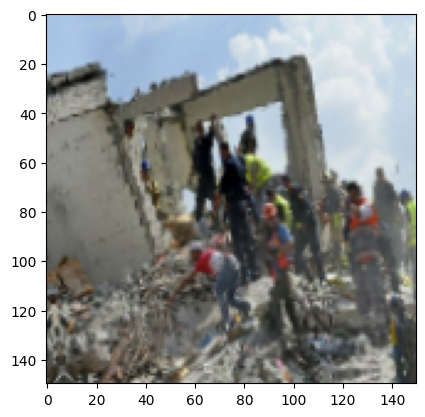

The label is 1, which means: earthquake
All labels: ['FAKE' 'earthquake']


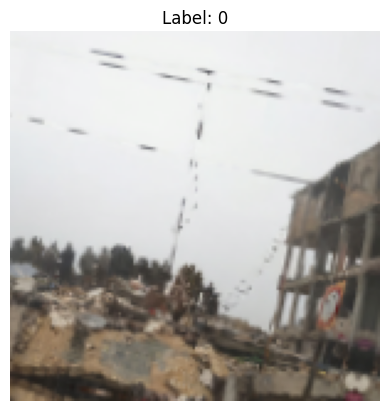

In [ ]:
#Here we demostrate a random image from the MEDIC Dataset and One from the 'fake vs real' dataset
# get a BATCH of dataset for inspection
for element in trainDS.as_numpy_iterator():
    x, y = element
    break

clear_output()

# check specification of the element of this dataset
print('Specification of element in this dataset')
print(trainDS.element_spec)

# show the batch of images and labels
print('\nExtract a BATCH from the dataset')
print(x.shape)
print(y.shape)

# show example
if 'i' not in globals():
    i = 0
else:
    i +=1
show_image(x[i]/255)
print(f'The label is {y[i]}, which means: {unique_label[y[i]]}')
print(f'All labels: {unique_label}')

# Specify the label value you want to filter
desired_label = 0

filtered_dataset = trainDS.filter(lambda img, label: tf.equal(label, desired_label)[0])

for element in filtered_dataset.take(1):
    x, y = element
    plt.imshow(x[0].numpy().astype('uint8'))
    plt.title(f'Label: {y[0]}')
    plt.axis('off')
    plt.show()

## Make pre-trained and prepare it for training


In [ ]:
#Importing the Model we will use for this project, EffecientNetB0
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

In [ ]:
#Freezing the trainable layers, and cllaing in weights, and using the same layers as taken.
def get_EfficientNetB0():
    # pretrained model
    preprocess_input = tf.keras.applications.efficientnet.preprocess_input
    base_model = tf.keras.applications.EfficientNetB0(input_shape = (150, 150, 3),
                                                      include_top = False,
                                                      weights = 'imagenet')
    base_model.trainable=False


        # create the global model
    inputs = tf.keras.Input(shape=(150, 150, 3))
    x = preprocess_input(inputs)
    x = base_model(x) #x = base_model(x, training=False)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(8, activation='softmax')(x)


    '''
    inputs = tf.keras.Input(shape=(224, 224, 3))

    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    x =  tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(512, activation='relu')(x)
    outputs = tf.keras.layers.Dense(8, activation='softmax')(x)
    '''
    model = tf.keras.Model(inputs, outputs)

    return model

disaster_predictor = get_EfficientNetB0()
disaster_predictor.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 5, 5, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               327936    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0   

In [ ]:
disaster_predictor = get_EfficientNetB0()
EPOCHS = 15


# Note: Setting to 1e-4 demostrates steady high accuracy with low overfitting until it reaches 50%
# 1e-3 = Demostrates fast accuracy increase, starting with 50% on first epoch, but almost 10% overfitting

opt = tf.keras.optimizers.Adam(
    learning_rate=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

disaster_predictor.compile(optimizer=opt,
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

history = disaster_predictor.fit(
      trainDS,
      epochs=EPOCHS,
      verbose=1,
      validation_data = valDS,)

In [ ]:
print('5syt6htyhjs')

In [ ]:
print('sbrgreb') + print('hgoiugoughouh')

Text(0.5, 1.0, 'Training (blue) and validation (orange) loss')

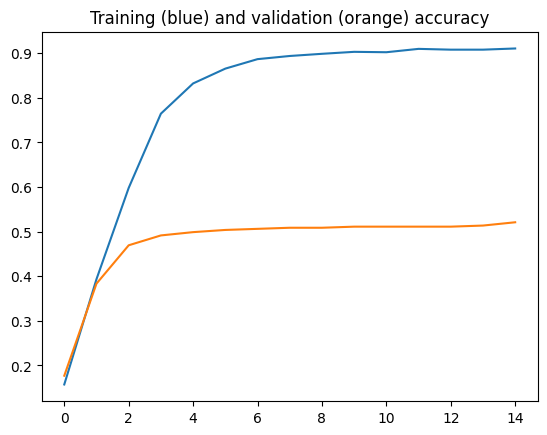

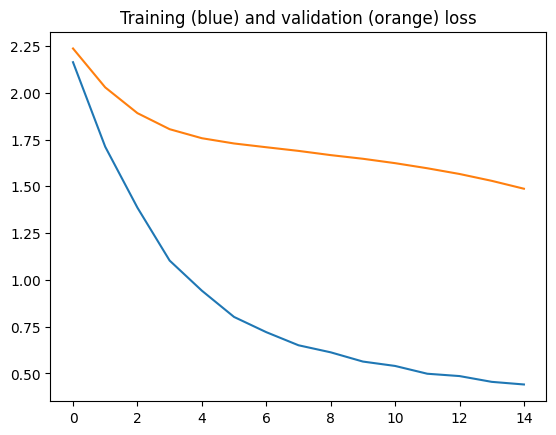

In [ ]:
#using regular adam

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training (blue) and validation (orange) accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training (blue) and validation (orange) loss'   )

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = disaster_predictor.predict(images, batch_size=10)
  print(classes[0])

Saving ai-generated-8635240_1280.jpg to ai-generated-8635240_1280.jpg
1/1 [==============================] - 0s 103ms/step
[0.11933482 0.08542647 0.07547264 0.02279426 0.05902766 0.04762518
 0.5466964  0.04362258]


In [ ]:
model = tf.keras.models.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Dense layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(7, activation='softmax')
])


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
EPOCH = 10

history = model.fit(
    x = trainDS,
    validation_data=valDS,
    epochs = EPOCH,
    callbacks = ReduceLROnPlateau(patience=10, verbose=1)
)

In [ ]:

EPOCHS = 10
history = model.fit(
      trainDS,
      epochs=EPOCHS,
      verbose=1,
      validation_data = valDS,)